In [9]:
import numpy
from math import sin, cos, log, ceil
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [10]:
# global constants
g = 9.8      # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}   
C_D = 1/5.  # drag coefficient --- or D/L if C_L=1
C_L = 1.0    # for convenience, use C_L = 1
x0 = 0.0     # horizotal position is arbitrary
y0 = 2.0  #average human height

In [11]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])
def euler_step(u, f, dt):
    return u + dt * f(u)

def plane_trajectory(v0,theta0):
    T = 20                       
    dt = 0.001                         
    N = int(T/dt) + 1            
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)
        if u[n+1,3] <0:
            break
    return u,n

In [12]:
v=np.linspace(4.9,9.,5)
theta=np.linspace(-pi/4.0,pi/4.,5)

x_range=np.zeros((5,5),dtype=float)

maxrange=0

plt.figure()
for i in range(5):
    for j in range(5):
        u,n=plane_trajectory(v[i],theta[j])
        x_path=u[0:n,2]
        y_path=u[0:n,3]
        x_range[i][j]=x_path[-1]
        if(x_range[i][j]>maxrange):
            maxrange=x_range[i][j]
            indexi=i
            indexj=j

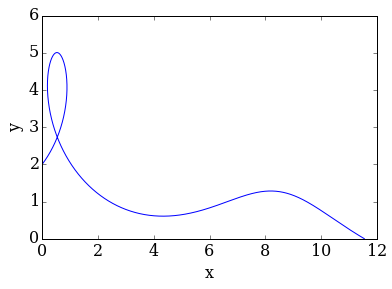

intial conditions:
velocity:  9.0 m/s
Theta:  -0.392699081699 deg
maximum range:  17.7502641864


In [13]:
plt.figure()
plt.plot(x_path,y_path)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("intial conditions:")
print("velocity: ",v[indexi],"m/s")
print("Theta: ",theta[indexj],"deg")

print("maximum range: ",maxrange)

In [16]:
print("theta_deg =", theta[indexj]*180/pi)

theta_deg = -22.5
